<a href="https://colab.research.google.com/github/GrigoryBartosh/hse08_ip/blob/master/hw2/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [373]:
cd 'drive/My Drive/ip_hw_2'

[Errno 2] No such file or directory: 'drive/My Drive/ip_hw_2'
/content/drive/My Drive/ip_hw_2


# Домашнее задание №2

Задание присылать на обе почты почты aleksartamonov@gmail.com dashkov.alexander.om@gmail.com в виде ссылки на colab

В теме письма указать **HSE2020 HW2 <Фамилия Имя>**

soft deadline: 09.02.2020T23:59:00+0300

hard deadline: 16.02.2020T23:59:00+0300

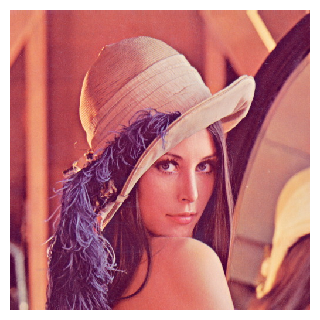

In [383]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def show(img, size=3):
    plt.figure(figsize=(size,size))
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

lena = cv2.imread("lena.jpg")
show(lena)

**1. (6 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [375]:
import numpy as np

from ipywidgets import interact, fixed
import ipywidgets as widgets

def gamma_correction_vals(c, gamma):
    lookUpTable = np.arange(0, 256, dtype=np.uint8)
    lookUpTable = np.clip(c * pow(lookUpTable / 255.0, gamma) * 255.0, 0, 255)
    return lookUpTable

def gamma_correction(img, c=1, gamma=1):
    lookUpTable = gamma_correction_vals(c, gamma).reshape(1, 256)
    return cv2.LUT(img, lookUpTable).astype(np.uint8)

def show_gamma_graph(c, gamma):
    vals = gamma_correction_vals(c, gamma)
    plt.plot(list(range(256)), vals)
    plt.xlabel('input val')
    plt.ylabel('output val')
    plt.show()

def task1(img, c=1, gamma=1):
    img_gamma = gamma_correction(img, c, gamma)
    show(img_gamma)
    show_gamma_graph(c, gamma)

interact(task1, 
         img=fixed(lena), 
         c=widgets.FloatLogSlider(value=1,
                                  min=-2.0,
                                  max=2.0,
                                  step=0.1,
                                  description='c:'),
         gamma=widgets.FloatLogSlider(value=1,
                                      min=-2.0,
                                      max=2.0,
                                      step=0.1,
                                      description='gamma:'))

interactive(children=(FloatLogSlider(value=1.0, description='c:', max=2.0, min=-2.0), FloatLogSlider(value=1.0…

<function __main__.task1>

**2. (5 баллов)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

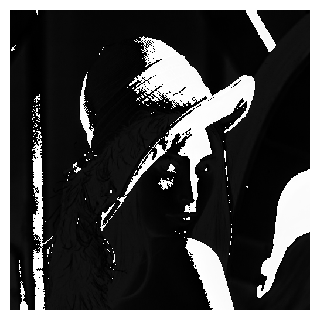

In [376]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

lena_norm = np.zeros(lena_gray.shape)
lena_norm = cv2.normalize(lena_gray, lena_norm, 0, 255, cv2.NORM_MINMAX)

lena_eq_hist = cv2.equalizeHist(lena_gray)

diff = abs(lena_gray - lena_norm)

task2_res = np.concatenate((lena_norm, lena_eq_hist, diff), axis=0)

show(diff)

**3. (5 баллов)** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

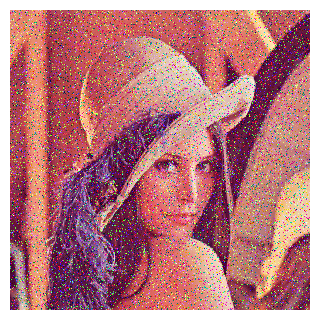

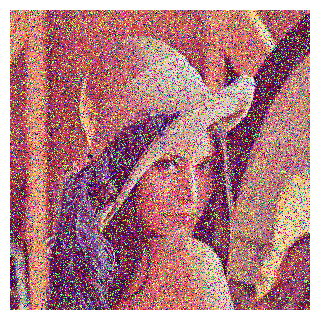

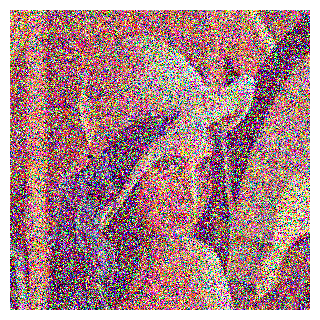

In [377]:
def salt_pepper(src, p, q):
    p_pix = np.where(np.random.binomial(1, p=p, size=src.shape))
    q_pix = np.where(np.random.binomial(1, p=q, size=src.shape))

    dst = src.copy()
    dst[p_pix] = 0
    dst[q_pix] = 255

    return dst

lena_b, lena_g, lena_r = cv2.split(lena)

for p in [0.05, 0.1, 0.15]:
    lena_b = salt_pepper(lena_b, p, p)
    lena_g = salt_pepper(lena_g, p, p)
    lena_r = salt_pepper(lena_r, p, p)

    lena_salt_pepper = cv2.merge((lena_b, lena_g, lena_r))
    show(lena_salt_pepper)

**4. (5 баллов)** Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

MSE = 892.9308293255148


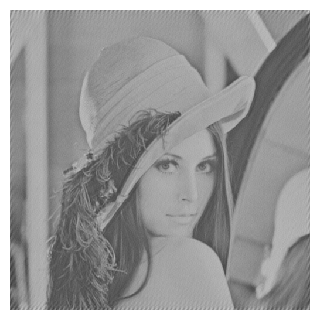

In [378]:
img = cv2.imread("lena_diagonal.jpg")
img = img[:, :, 0]

img_target = cv2.imread("lena_gray_512.tif")
img_target = img_target[:, :, 0]

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

r1, r2, r3 = 23, 10, 184
c = np.array([256, 255])
v = np.array([36, 72])
for x in range(512):
    for y in range(512):
        p = np.array([x, y])
        if ((p - (c - v)) ** 2).sum() < r1 ** 2 or \
           ((p - (c + v)) ** 2).sum() < r2 ** 2 or \
           ((p - c) ** 2).sum() > r3 ** 2 or \
           p[0] == c[0] + v[0] or \
           p[1] == c[1] + v[1]:
            fshift[x, y] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = img_back.real

mse = ((img_back - img_target) ** 2).mean()
print(f"MSE = {mse}")

img_back = np.array(img_back, dtype=np.uint8)
show(img_back)

**5. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

MSE = 137.07026163736978


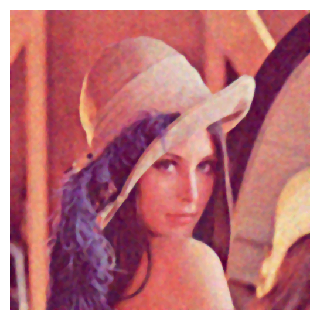

In [558]:
img = cv2.imread("lena_color_512-noise.tif")

img_target = cv2.imread("lena_color_512.tif")

img_back = img.copy()
for _ in range(3):
    img_back = cv2.medianBlur(img_back, 5)

mse = ((1. * img_back - img_target) ** 2).mean()
print(f"MSE = {mse}")

show(img_back)

**6. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором удален весь текст и оставлены только границы таблицы

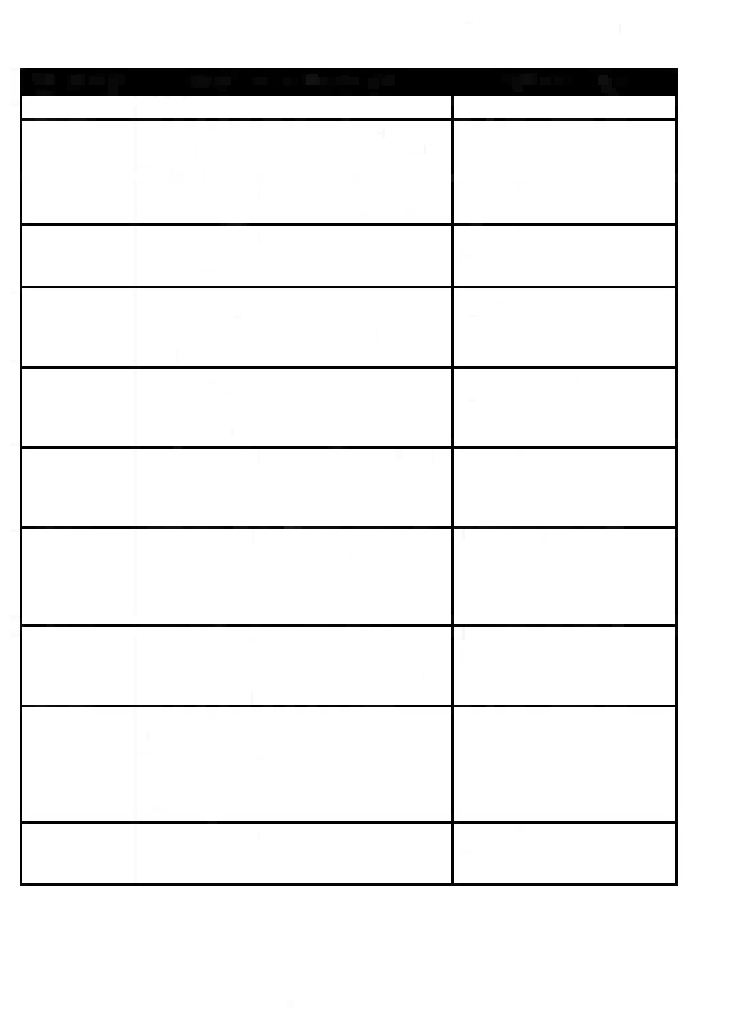

In [634]:
table = cv2.imread("table.jpg")

kernel = np.ones((2, 2), np.uint8)
table = cv2.dilate(table, kernel, iterations=1)

table_h = table.copy()
kernel_h = np.array([[0, 0, 0],
                     [1, 1, 1],
                     [0, 0, 0]], np.uint8)
table_h = cv2.dilate(table_h, kernel_h, iterations=2)
table_h = cv2.erode(table_h, kernel_h, iterations=2)

table_v = table.copy()
kernel_v = np.array([[0, 1, 0],
                     [0, 1, 0],
                     [0, 1, 0]], np.uint8)
table_v = cv2.dilate(table_v, kernel_v, iterations=2)
table_v = cv2.erode(table_v, kernel_v, iterations=2)

table = cv2.bitwise_and(table_h, table_v)

table = cv2.erode(table, kernel, iterations=6)
table = cv2.dilate(table, kernel, iterations=5)

show(table, size=10)

**7. (5 баллов)** Отделите монеты от фона на изображении $coins\_1.jpg$, отсортируйте монеты по убыванию размера. Сгенерируйте результирующее изображение с цветной разметкой областей, соответствующих монетам на исходном изображении: на черном фоне должны быть выделены разными цветами области, соответствующие монетам. В центре каждой выделенной области разместите порядковый номер монеты в соответствии с сортировкой монет по размеру (в центре области, соответствующей самой большой монете, должно стоять число 1)

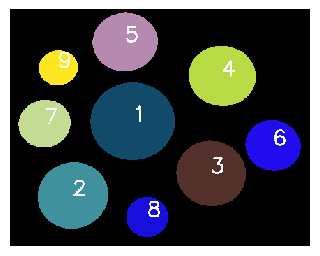

In [750]:
coins_1 = cv2.imread("coins_1.jpg")

coins_1_gray = cv2.cvtColor(coins_1, cv2.COLOR_BGR2GRAY)

_, coins_1_bin = cv2.threshold(coins_1_gray, 50, 255, cv2.THRESH_BINARY)

cnt, pix = cv2.connectedComponents(coins_1_bin)

for i in range(cnt):
    if (pix == i).sum() < 100:
        coins_1_bin[np.where(pix == i)] = 0
coins_1_bin_inv = cv2.bitwise_not(coins_1_bin)
cnt, pix = cv2.connectedComponents(coins_1_bin_inv)

coins_1_bin = np.ones(coins_1_bin.shape, np.uint8) * 255
coins_1_bin[np.where(pix == pix[0, 0])] = 0
cnt, pix = cv2.connectedComponents(coins_1_bin)

task7_res = np.zeros(coins_1.shape, np.uint8)
cmps = list(range(cnt))
cmps.sort(key=lambda c: (pix == c).sum())
cmps = cmps[:-1][::-1]
for i, c in enumerate(cmps, 1):
    color = np.random.randint(0, 256, size=3, dtype=np.uint8)
    task7_res[np.where(pix == c)] = color

    center = np.array(np.where(pix == c)).mean(axis=1).astype(np.int32)
    cv2.putText(task7_res, str(i),
                (center[1], center[0]),
                cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255, 255, 255), 2)

show(task7_res)

**8. (5 баллов)** Отделите монеты от текста на изображении $coins\_2.jpg.$ Сгенерируйте по входному изображению два изображения: на одном должны остаться только монеты, весь текст должен быть удален; на втором изображении должен остаться только текст, все монеты должны быть удалены.

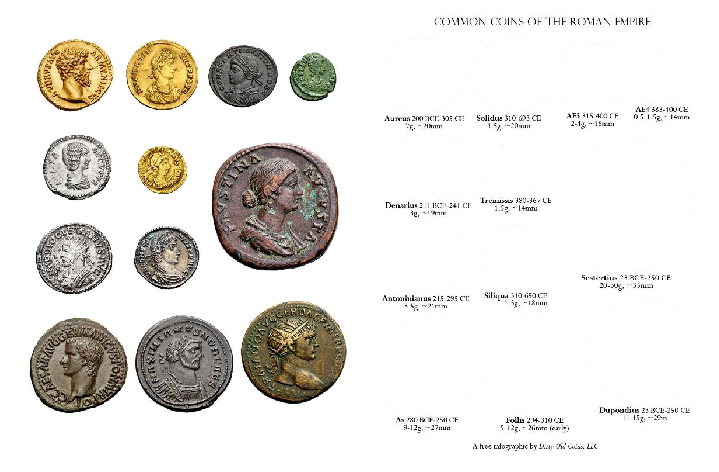

In [797]:
coins_2 = cv2.imread("coins_2.jpg")

coins_2_gray = cv2.cvtColor(coins_2, cv2.COLOR_BGR2GRAY)

_, coins_2_bin = cv2.threshold(coins_2_gray, 240, 255, cv2.THRESH_BINARY)

coins_2_bin_inv = cv2.bitwise_not(coins_2_bin)
cnt, pix = cv2.connectedComponents(coins_2_bin_inv)

for i in range(cnt):
    if (pix == i).sum() < 600:
        coins_2_bin_inv[np.where(pix == i)] = 0
coins_2_bin = cv2.bitwise_not(coins_2_bin_inv)
cnt, pix = cv2.connectedComponents(coins_2_bin)

coins_2_bin = np.zeros(coins_2_bin.shape, np.uint8)
coins_2_bin[np.where(pix == pix[0, 0])] = 255

kernel = np.ones((1, 10), np.uint8)
coins_2_bin = cv2.erode(coins_2_bin, kernel, iterations=1)

tsak8_1 = coins_2.copy()
tsak8_1[np.where(coins_2_bin == 255)] = 255

tsak8_2 = coins_2.copy()
tsak8_2[np.where(coins_2_bin == 0)] = 255

tsak8 = np.concatenate((tsak8_1, tsak8_2), axis=1)

show(tsak8, size=7)

### Сравнение глобальных признаков 

Для задач 9 и 10 надо реализовать общую функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор) 
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

**9. (9 баллов)** Посмотрите на изображения в папке *Coral*. Посчитайте гистограммы изображений. Выведите на экран 20 пар изображений с максимально похожими гистограммами. В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

**10. (10 баллов)** Посмотрите на изображения в папке *leaves*. Посчитайте дескрипторы Фурье для каждого листочка изображений. Выведите на экран 20 пар изображений с максимально похожими дескрипторами.